In [59]:
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()

In [60]:
database, task = 'pitt', 'cookie'

print('Database:', database)
print('Task:', task)

#####

y_probs = np.load(f'../reports/y_probs_{database}_{task}.npy').T[1]
y_true = np.load(f'../reports/y_true_{database}_{task}.npy')

print('\nNb files:', len(y_probs))

labels_predictions = (y_probs>=0.5).astype(int)

cm = confusion_matrix(y_true = y_true, y_pred= labels_predictions)
tn, fp, fn, tp = cm.ravel()

print('\nConfusion Matrix:\n', cm)

print('\nTrue Negative ("I don\'t  have dementia, and I am predicted as fine"):', tn, f'({round(tn/(tn+fp)*100,2)}% of control files)')
print('\tMean proba:', round(np.mean(y_probs[(y_probs <= 0.5) * (y_true == False)]),3))
print('True Positive ("I have dementia, and I am predicted as dementia"):', tp, f'({round(tp/(tp+fn)*100,2)}% of dementia files)')
print('\tMean proba:', round(np.mean(y_probs[(y_probs >= 0.5) * (y_true == True)]),3))
print('\nFalse Positive ("I don\'t have dementia, but I am wrongly predicted as dementia"):', fp, f'({round(fp/(tn+fp)*100,2)}% of control files)')
print('\tPredicted probas:', [round(a,3) for a in y_probs[(y_probs >= 0.5) * (y_true == False)]])
print('False Negative ("I have dementia, but I am wrongly predicted as fine"):', fn, f'({round(fn/(tp+fn)*100,2)}% of dementia files)')
print('\tPredicted probas:', [round(a,3) for a in y_probs[(y_probs <= 0.5) * (y_true == True)]])

accuracy = (tn+tp)/len(y_true)
print('\nAccuracy:', accuracy)

precision = (tp)/(tp+fp)
print('Precision:', precision)

recall = (tp)/(tp+fn)
print('Recall:', recall)

f1score = (2*tp)/(2*tp+fp+fn)
print('F1-score:', f1score)

roc_auc_value = roc_auc_score(y_true, y_probs, average=None)
print('\nROC-AUC:', roc_auc_value)

Database: pitt
Task: cookie

Nb files: 107

Confusion Matrix:
 [[33  9]
 [10 55]]

True Negative ("I don't  have dementia, and I am predicted as fine"): 33 (78.57% of control files)
	Mean proba: 0.411
True Positive ("I have dementia, and I am predicted as dementia"): 55 (84.62% of dementia files)
	Mean proba: 0.611

False Positive ("I don't have dementia, but I am wrongly predicted as dementia"): 9 (21.43% of control files)
	Predicted probas: [0.573, 0.605, 0.553, 0.666, 0.704, 0.692, 0.599, 0.504, 0.551]
False Negative ("I have dementia, but I am wrongly predicted as fine"): 10 (15.38% of dementia files)
	Predicted probas: [0.491, 0.437, 0.46, 0.366, 0.314, 0.462, 0.427, 0.362, 0.4, 0.421]

Accuracy: 0.822429906542056
Precision: 0.859375
Recall: 0.8461538461538461
F1-score: 0.8527131782945736

ROC-AUC: 0.8194139194139194


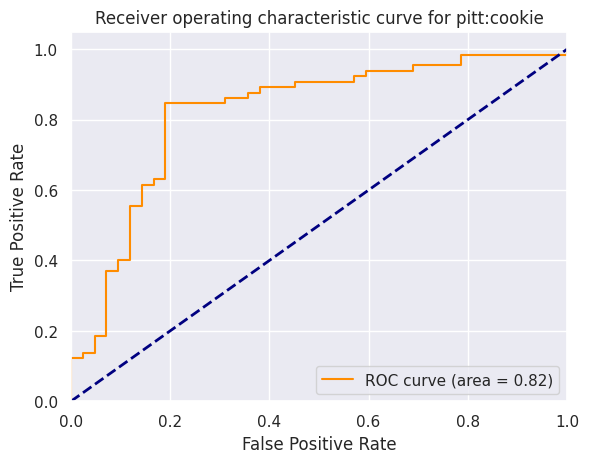

In [61]:
# plot ROC curve

fpr, tpr, thresholds = roc_curve(y_true.astype(int), y_probs)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    label="ROC curve (area = %0.2f)" % roc_auc_value,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Receiver operating characteristic curve for {database}:{task}")
plt.legend(loc="lower right")
plt.savefig(f'../reports/figures/ROC_{database}_{task}.png')

In [62]:
from src.data.get_trancript_dataloader import split_dataset

# Load datasets
train_dataset, _, test_dataset = split_dataset('../data/processed/')

train_set, test_set = train_dataset.data_list, test_dataset.data_list

In [63]:
print('Max proba from test set:', np.max(y_probs))
test_set[np.argmax(y_probs)]

Max proba from test set: 0.7983293032848451


Transcript(id=544, is_dementia=True, database='pitt', task='cookie', id_subject=269, id_recording=1, embedding_vector_path='../data/processed/dementia/pitt/cookie/269-1.npy')

In [64]:
print('Min proba from test set:', np.min(y_probs))
test_set[np.argmin(y_probs)]

Min proba from test set: 0.31382935716487736


Transcript(id=441, is_dementia=True, database='pitt', task='cookie', id_subject=120, id_recording=4, embedding_vector_path='../data/processed/dementia/pitt/cookie/120-4.npy')